In [ ]:
#Analisando os dados
df.head()

,Time (s),CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
0,0.000,0.0,48.4700,24.6200,247.4926,0.2000,0.6831,0.6992,1.1940,16.0255,23.0855,11.2872,19.5953,53.0355,47.0753,55.1962,63.9090,51.8182,49.4775,63.3641
1,0.309,0.0,48.4700,24.6200,243.8282,0.1998,0.6649,0.6976,1.1514,15.2863,22.4605,10.3764,18.5686,53.0355,48.4789,52.8143,62.4980,50.3466,49.7900,63.3641
2,0.618,0.0,48.4700,24.6200,243.0668,0.2000,0.6481,0.6863,1.1133,14.3923,20.8138,9.8742,17.7525,43.7627,47.3693,55.5168,57.9038,51.5393,50.0533,65.8253
3,0.928,0.0,48.4700,24.6200,242.3030,0.2000,0.6318,0.6757,1.0795,14.0074,19.5772,9.3127,16.6801,53.0355,46.8330,51.5578,63.9090,52.4422,49.2201,62.4461
4,1.237,0.0,48.4702,24.6206,241.5632,0.2000,0.6178,0.6659,1.0480,13.1437,18.6348,8.7301,15.6956,59.7614,46.3085,54.5033,57.5565,51.5393,49.4775,64.8363


In [1]:
#AMOSTRAGEM DOS DADOS

import pandas as pd
import os

# Caminho da pasta
pasta = "data"

# Lista todos os arquivos csv
arquivos = [f for f in os.listdir(pasta) if f.endswith(".csv")]

# Lista para guardar os dataframes
lista_df = []

for arquivo in arquivos:
    caminho = os.path.join(pasta, arquivo)
    df = pd.read_csv(caminho)
    lista_df.append(df)

# Concatenar tudo
dados = pd.concat(lista_df, ignore_index=True)

print("Shape original:", dados.shape)


Shape original: (3843160, 20)


In [29]:
dados = dados.sample(n=300000, random_state=42)
print("Shape após amostragem:", dados.shape)


Shape após amostragem: (300000, 20)


In [17]:
# DEFINIÇÃO DAS FEATURES E ALVO


# Sensores R1–R14
colunas_sensores = [col for col in dados.columns if "R" in col]

# Variáveis ambientais (ajuste nomes se necessário)
variaveis_ambientais = ["Temperature (C)", "Humidity (%r.h.)"]

# Conjunto final de entrada
X = dados[colunas_sensores + variaveis_ambientais]

# Variável alvo
y = dados["CO (ppm)"]

print("Total de features:", X.shape[1])
print("Features usadas:", X.columns)


Total de features: 16
Features usadas: Index(['R1 (MOhm)', 'R2 (MOhm)', 'R3 (MOhm)', 'R4 (MOhm)', 'R5 (MOhm)',
       'R6 (MOhm)', 'R7 (MOhm)', 'R8 (MOhm)', 'R9 (MOhm)', 'R10 (MOhm)',
       'R11 (MOhm)', 'R12 (MOhm)', 'R13 (MOhm)', 'R14 (MOhm)',
       'Temperature (C)', 'Humidity (%r.h.)'],
      dtype='str')


In [18]:
#  TREINO E TESTE


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Treino:", X_train.shape)
print("Teste:", X_test.shape)


Treino: (240000, 16)
Teste: (60000, 16)


In [19]:
# NORMALIZAÇÃO


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
# REGRESSÃO LINEAR


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("=== Regressão Linear ===")
print("R2:", r2_lr)
print("RMSE:", rmse_lr)


=== Regressão Linear ===
R2: 0.5253551434340138
RMSE: 4.408561146051799


In [21]:
# MLP REGRESSOR


from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    batch_size=1024,
    max_iter=50,
    early_stopping=True,
    n_iter_no_change=5,
    random_state=42,
    verbose=True
)

mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)

# Garantir que não haja valores negativos
y_pred_mlp = np.maximum(0, y_pred_mlp)

r2_mlp = r2_score(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))

print("\n=== MLP ===")
print("R2:", r2_mlp)
print("RMSE:", rmse_mlp)


Iteration 1, loss = 24.91610038
Validation score: 0.452572
Iteration 2, loss = 9.57078590
Validation score: 0.599155
Iteration 3, loss = 8.04870852
Validation score: 0.625677
Iteration 4, loss = 7.69284621
Validation score: 0.636063
Iteration 5, loss = 7.45164043
Validation score: 0.648649
Iteration 6, loss = 7.20904254
Validation score: 0.658462
Iteration 7, loss = 7.02620901
Validation score: 0.665724
Iteration 8, loss = 6.89841469
Validation score: 0.670694
Iteration 9, loss = 6.83330590
Validation score: 0.672618
Iteration 10, loss = 6.76402737
Validation score: 0.675315
Iteration 11, loss = 6.73140087
Validation score: 0.677283
Iteration 12, loss = 6.69154421
Validation score: 0.674841
Iteration 13, loss = 6.67309553
Validation score: 0.678255
Iteration 14, loss = 6.63073704
Validation score: 0.681437
Iteration 15, loss = 6.61726931
Validation score: 0.682692
Iteration 16, loss = 6.58399100
Validation score: 0.684171
Iteration 17, loss = 6.55153998
Validation score: 0.685800
Itera

d:\Program Files\Desktop\regressão_linear\gas-sensor-mlp-regression\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [27]:
#Ver importância das variáveis (para Regressão Linear)

import pandas as pd

coef_df = pd.DataFrame({
    "Variável": X.columns,
    "Coeficiente": lr.coef_
})

coef_df.sort_values(by="Coeficiente", key=abs, ascending=False)


,Variável,Coeficiente
9,R10 (MOhm),-14.791258
12,R13 (MOhm),-13.105319
11,R12 (MOhm),7.455402
10,R11 (MOhm),7.052477
6,R7 (MOhm),6.706447
5,R6 (MOhm),-4.728893
8,R9 (MOhm),4.420815
7,R8 (MOhm),3.856366
4,R5 (MOhm),-2.710265
2,R3 (MOhm),2.506457


In [22]:
print("\n============================")
print("COMPARAÇÃO FINAL")
print("============================")

print("Regressão Linear  → R2:", r2_lr, "| RMSE:", rmse_lr)
print("MLP               → R2:", r2_mlp, "| RMSE:", rmse_mlp)



COMPARAÇÃO FINAL
Regressão Linear  → R2: 0.5253551434340138 | RMSE: 4.408561146051799
MLP               → R2: 0.7030593405802648 | RMSE: 3.4869627947554074


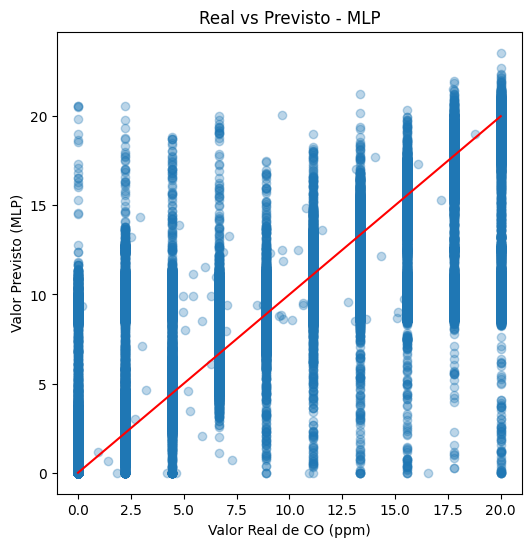

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_mlp, alpha=0.3)
plt.xlabel("Valor Real de CO (ppm)")
plt.ylabel("Valor Previsto (MLP)")
plt.title("Real vs Previsto - MLP")

# linha ideal
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')

plt.show()


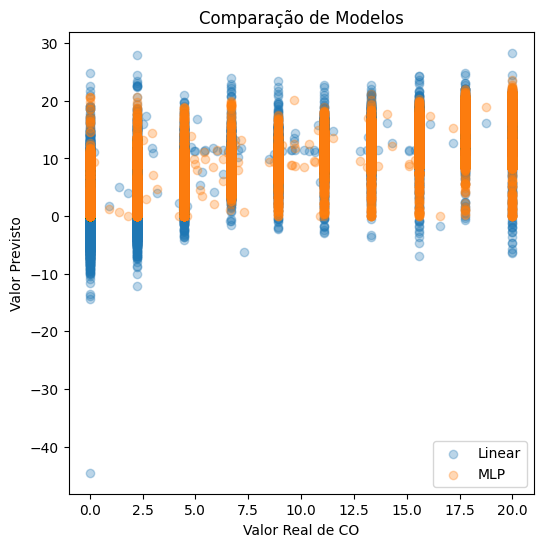

In [25]:
plt.figure(figsize=(6,6))

plt.scatter(y_test, y_pred_lr, alpha=0.3, label="Linear")
plt.scatter(y_test, y_pred_mlp, alpha=0.3, label="MLP")

plt.xlabel("Valor Real de CO")
plt.ylabel("Valor Previsto")
plt.legend()
plt.title("Comparação de Modelos")
plt.show()
